<a href="https://colab.research.google.com/github/gstripling00/conferences/blob/main/course_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In this section, we will seek to gain insight into the data using visuals such as: Bar charts, Heat maps, histograms, scatter plots, and more.

The exercises for this challenge lab are found in the EDA section.
# EXERCISES  - Under the Exploratory Data Analysis Section
1. Bar Chart - Count how contracts are distributed
2. Pie Chart - Graph contract type by distribution
3. Scatter Chart - Graph Tenure in Months vs. Total Revenue
4. Heat Map - Enter Code to visualize feature relationships
5. Histogram - Graph a histogram of Tenure
6. Simple Feature Engineering - Create the Customer Lifetime Value
7. Save the cleaned file - code provided.

#Load and Explore the Data

In the previous lab, you performed data preprocessing. In this exercise, you perform Exploratory Data Analysis (EDA).

First, upload the cleaned_telecom.csv file.

Next, run all the cells in the **Load and Explore the Data** and in the Data Preprocessing sectiosn. Your hands-on exercise begins in the Data Visualization and Analysis section.

## Step 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns


##Step 2. Load Data

In [2]:
#Load the dataset

df=pd.read_csv('/content/T-SCCE-I clean_data.csv')


##Step 3. Initial Exploration

#### 3.1 Show first five rows of the DataFrame.

In [3]:
# Show first five rows

df.head()

,feedback_date,feedback_csat,feedback_csat_explanation,feedback_csat_lab_quality,feedback_csat_lecture_quality,feedback_csat_open_feedback,feedback_csat_materials,feedback_csat_lab_lecture_balance
0,2024-03-14,1.0,NaN,1.0,NaN,Skin zone Greg,NaN,NaN
1,2024-03-29,4.0,The UI for SCC is not very user friendly or in...,5.0,4.0,"I learn best by doing, so I would have preferr...",NaN,4.0
2,2024-03-30,5.0,satisfied with the knowledge,NaN,NaN,NaN,NaN,NaN
3,2024-04-01,5.0,NaN,4.0,NaN,NaN,NaN,NaN
4,2024-04-02,4.0,NaN,4.0,4.0,NaN,NaN,3.0


### 3.2 Show the last five rows of the DataFrame

In [4]:
df.tail()

,feedback_date,feedback_csat,feedback_csat_explanation,feedback_csat_lab_quality,feedback_csat_lecture_quality,feedback_csat_open_feedback,feedback_csat_materials,feedback_csat_lab_lecture_balance
84,2024-09-08,4.0,N.A,4.0,4.0,N.A.,NaN,3.0
85,2024-09-09,4.0,"Give me a basic background, I hope it will giv...",2.0,4.0,More labs to gain hands-on experience.,NaN,3.0
86,2024-09-15,4.0,NaN,4.0,4.0,NaN,NaN,3.0
87,2024-09-17,3.0,NaN,3.0,3.0,NaN,NaN,3.0
88,2024-10-03,3.0,NaN,4.0,4.0,NaN,NaN,3.0


### 3.3 Show information about the Data



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   feedback_date                      89 non-null     object 
 1   feedback_csat                      88 non-null     float64
 2   feedback_csat_explanation          29 non-null     object 
 3   feedback_csat_lab_quality          79 non-null     float64
 4   feedback_csat_lecture_quality      80 non-null     float64
 5   feedback_csat_open_feedback        20 non-null     object 
 6   feedback_csat_materials            0 non-null      float64
 7   feedback_csat_lab_lecture_balance  80 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.7+ KB


In [7]:
# Clean column names for consistency
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('__', '_')

# Fill NaN for feedback text columns and convert date column to datetime
df['feedback_date'] = pd.to_datetime(df['feedback_date'], errors='coerce')
df['feedback_csat_explanation'] = df['feedback_csat_explanation'].fillna("No feedback")
df['feedback_csat_open_feedback'] = df['feedback_csat_open_feedback'].fillna("No feedback")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   feedback_date                      89 non-null     datetime64[ns]
 1   feedback_csat                      88 non-null     float64       
 2   feedback_csat_explanation          89 non-null     object        
 3   feedback_csat_lab_quality          79 non-null     float64       
 4   feedback_csat_lecture_quality      80 non-null     float64       
 5   feedback_csat_open_feedback        89 non-null     object        
 6   feedback_csat_materials            0 non-null      float64       
 7   feedback_csat_lab_lecture_balance  80 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 5.7+ KB


In [8]:
df.head()

,feedback_date,feedback_csat,feedback_csat_explanation,feedback_csat_lab_quality,feedback_csat_lecture_quality,feedback_csat_open_feedback,feedback_csat_materials,feedback_csat_lab_lecture_balance
0,2024-03-14,1.0,No feedback,1.0,NaN,Skin zone Greg,NaN,NaN
1,2024-03-29,4.0,The UI for SCC is not very user friendly or in...,5.0,4.0,"I learn best by doing, so I would have preferr...",NaN,4.0
2,2024-03-30,5.0,satisfied with the knowledge,NaN,NaN,No feedback,NaN,NaN
3,2024-04-01,5.0,No feedback,4.0,NaN,No feedback,NaN,NaN
4,2024-04-02,4.0,No feedback,4.0,4.0,No feedback,NaN,3.0


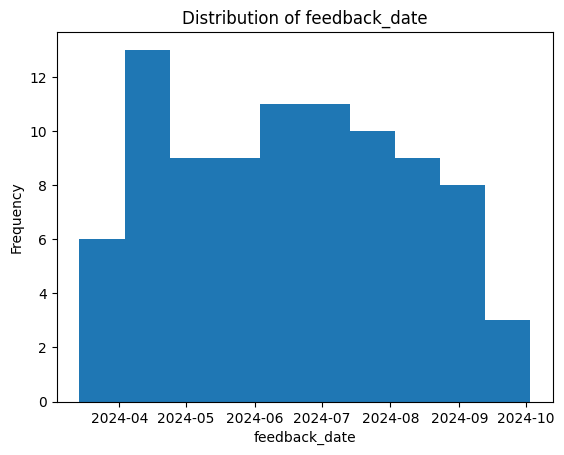

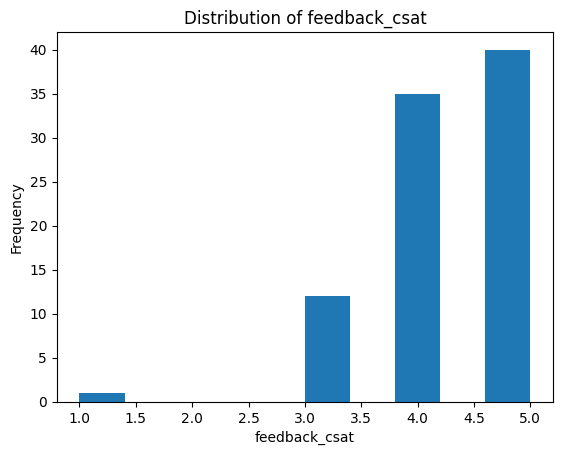

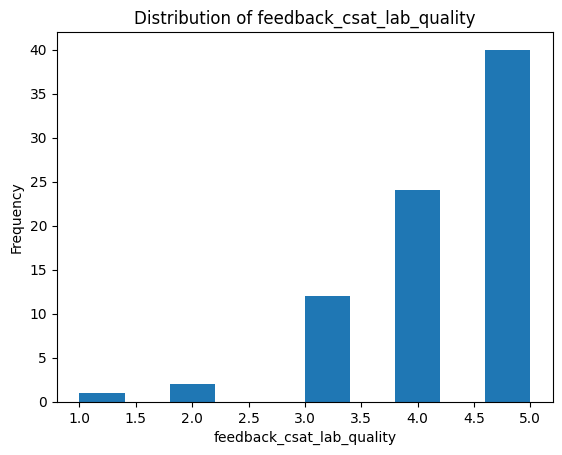

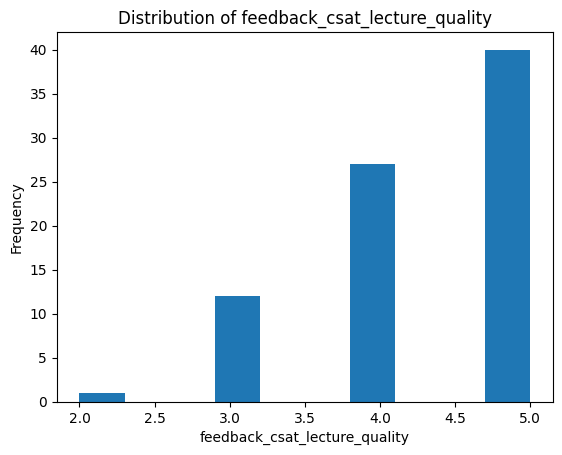

Skipping feedback_csat_materials as it contains only NaN values after cleaning.


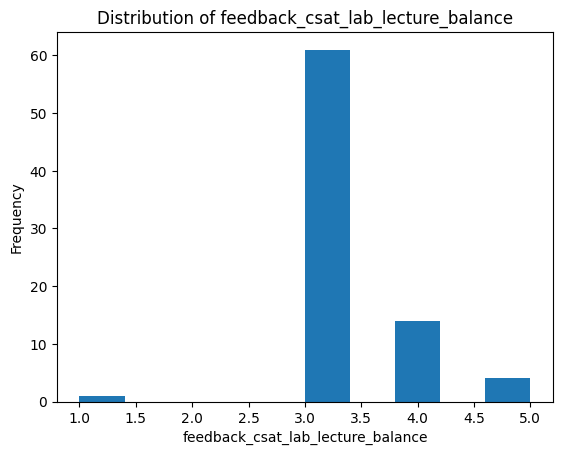

In [9]:
#Let's deal with Numeric Nans

# Extracting numerical columns
numeric_columns = df.columns[df.dtypes != 'object']

# Plotting the distribution of each numerical column
for col in numeric_columns:
    # Remove NaN values before plotting
    data_to_plot = df[col].dropna()

    # Check if there's any data left to plot after removing NaN
    if len(data_to_plot) > 0:
        plt.hist(data_to_plot)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        print(f"Skipping {col} as it contains only NaN values after cleaning.")


# CSAT Score Averages

In [10]:
# Calculate average CSAT scores for each column
csat_columns = ['feedback_csat', 'feedback_csat_lab_quality', 'feedback_csat_lecture_quality',
                'feedback_csat_materials', 'feedback_csat_lab_lecture_balance']
average_csats = df[csat_columns].mean()
print("Average CSAT Scores:\n", average_csats)


Average CSAT Scores:
 feedback_csat                        4.284091
feedback_csat_lab_quality            4.265823
feedback_csat_lecture_quality        4.325000
feedback_csat_materials                   NaN
feedback_csat_lab_lecture_balance    3.250000
dtype: float64


#Temporal CSAT Trends

In [11]:
# Set feedback_date as the index for time-based analysis
df.set_index('feedback_date', inplace=True)

# Resample monthly and calculate mean CSAT scores per month
monthly_csat_trends = df[csat_columns].resample('M').mean()
print("Monthly CSAT Trends:\n", monthly_csat_trends)


Monthly CSAT Trends:
                feedback_csat  feedback_csat_lab_quality  \
feedback_date                                             
2024-03-31          3.333333                   3.000000   
2024-04-30          4.500000                   4.529412   
2024-05-31          4.250000                   4.333333   
2024-06-30          4.142857                   4.166667   
2024-07-31          4.444444                   4.500000   
2024-08-31          4.384615                   4.166667   
2024-09-30          4.000000                   3.250000   
2024-10-31          3.000000                   4.000000   

               feedback_csat_lecture_quality  feedback_csat_materials  \
feedback_date                                                           
2024-03-31                          4.000000                      NaN   
2024-04-30                          4.352941                      NaN   
2024-05-31                          4.466667                      NaN   
2024-06-30            

<ipython-input-11-51d0375c95c1>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_csat_trends = df[csat_columns].resample('M').mean()


#Sentiment Analysis on Feedback Text

In [12]:
from textblob import TextBlob

# Analyze sentiment polarity in 'feedback_csat_explanation' and 'feedback_csat_open_feedback'
df['explanation_sentiment'] = df['feedback_csat_explanation'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['open_feedback_sentiment'] = df['feedback_csat_open_feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check overall sentiment averages
print("Sentiment Analysis:\n", df[['explanation_sentiment', 'open_feedback_sentiment']].mean())


Sentiment Analysis:
 explanation_sentiment      0.116200
open_feedback_sentiment    0.057929
dtype: float64


#Distribution of Feedback Quality Scores

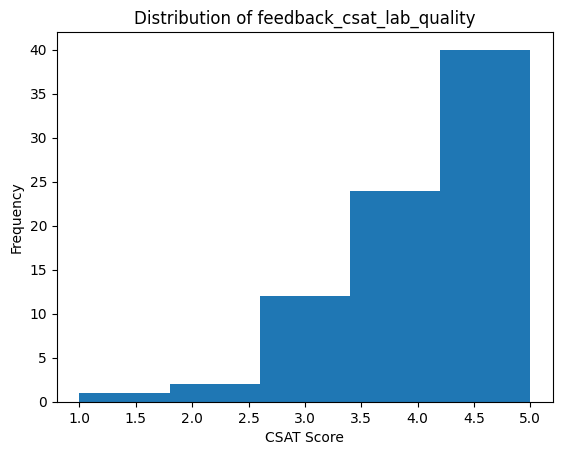

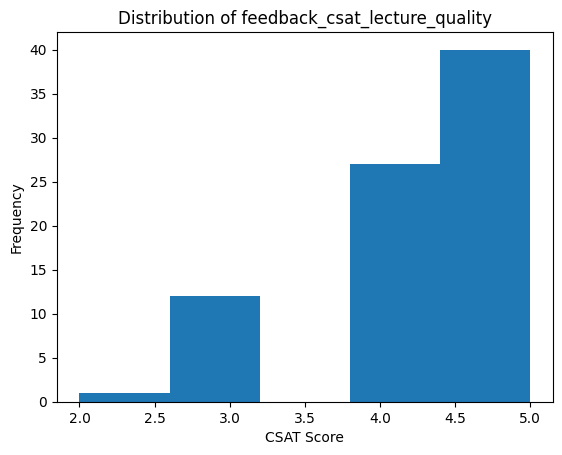

In [13]:

# Plot distribution for lab and lecture quality CSAT scores
for col in ['feedback_csat_lab_quality', 'feedback_csat_lecture_quality']:
    plt.figure()
    df[col].dropna().plot(kind='hist', bins=5, title=f'Distribution of {col}')
    plt.xlabel('CSAT Score')
    plt.ylabel('Frequency')
    plt.show()


#CSAT Over Time

#CSAT Distribution by Category

Box plots can help you visualize the distribution and identify any outliers in the CSAT scores across different categories.

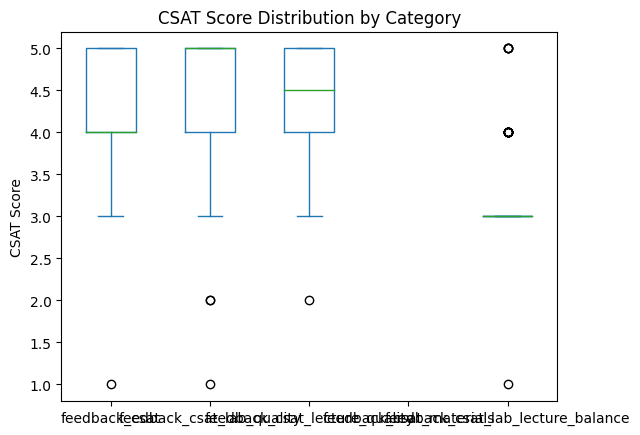

In [17]:
# Box plot for CSAT scores by category
df[['feedback_csat', 'feedback_csat_lab_quality', 'feedback_csat_lecture_quality',
      'feedback_csat_materials', 'feedback_csat_lab_lecture_balance']].plot(kind='box')
plt.title('CSAT Score Distribution by Category')
plt.ylabel('CSAT Score')
plt.show()


#Feedback Sentiment Histogram (Sentiment Analysis Results)


Visualizing sentiment scores with a histogram provides insights into the distribution of positive and negative sentiments.

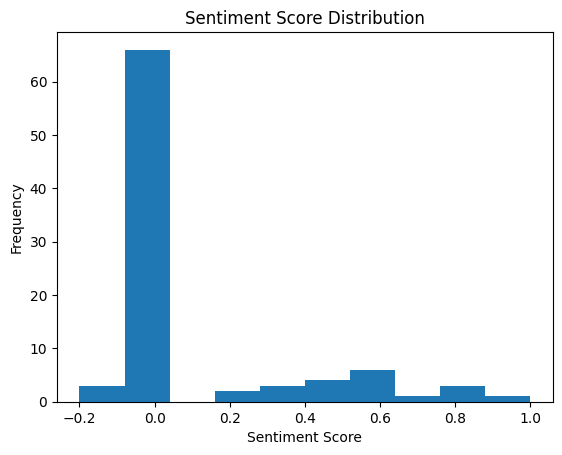

In [18]:
from textblob import TextBlob

# Generate sentiment scores
df['explanation_sentiment'] = df['feedback_csat_explanation'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot histogram for sentiment scores
plt.figure()
df['explanation_sentiment'].plot(kind='hist', bins=10, title='Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


NameError: name 'correlation_matrix' is not defined

In [38]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix (optional)
print(correlation_matrix)

ValueError: could not convert string to float: 'No feedback'

# CSAT Score Pie Chart by Lab and Lecture Quality

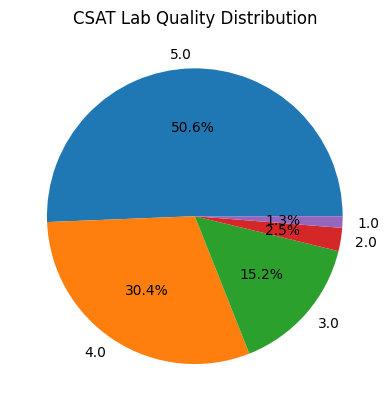

In [19]:
# Count the distribution of lab quality scores and plot
lab_quality_counts = df['feedback_csat_lab_quality'].value_counts()
lab_quality_counts.plot(kind='pie', autopct='%1.1f%%', title='CSAT Lab Quality Distribution')
plt.ylabel('')
plt.show()


#WordCloud for Text Feedback

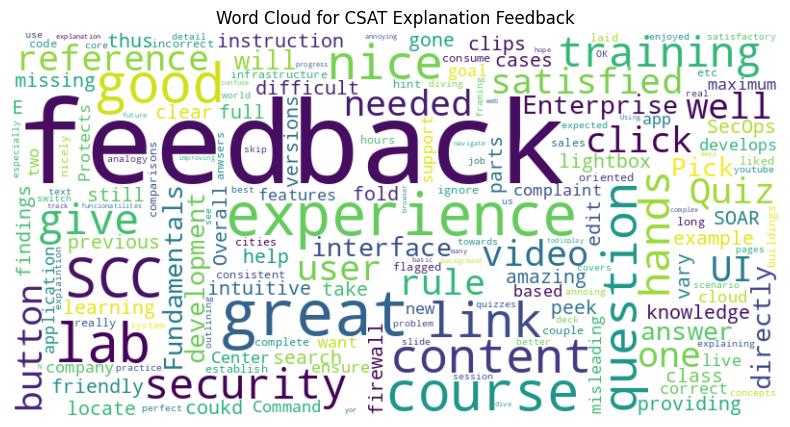

In [20]:
from wordcloud import WordCloud

# Generate word cloud for 'feedback_csat_explanation'
text = ' '.join(df['feedback_csat_explanation'].dropna())

# Display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for CSAT Explanation Feedback')
plt.show()


#Bar Chart for Common Words in Feedback

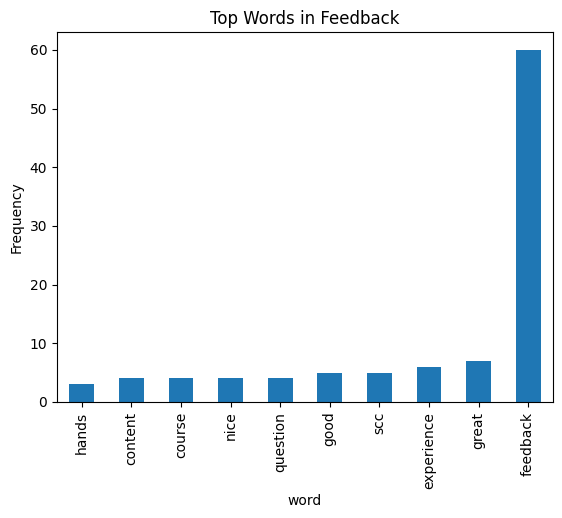

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Extract common words in feedback using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(df['feedback_csat_explanation'].fillna("")).toarray()
word_counts_sum = word_counts.sum(axis=0)

# Convert to DataFrame and plot
common_words_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_counts_sum})
common_words_df.set_index('word').sort_values(by='count').plot(kind='bar', legend=None, title='Top Words in Feedback')
plt.ylabel('Frequency')
plt.show()


# Moving Average of CSAT Scores (Rolling Line Chart)
A rolling average smooths fluctuations and highlights trends over time.

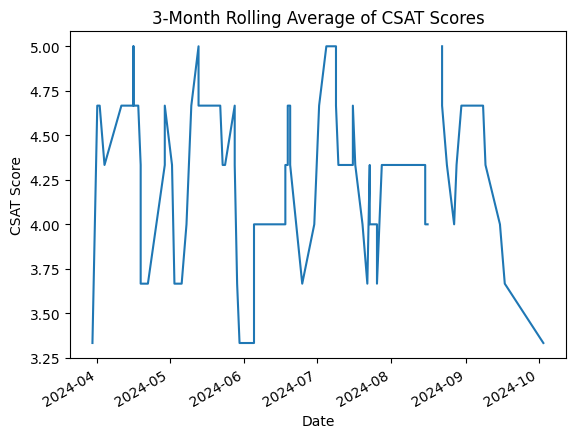

In [24]:
#Rolling CSAT Monthly Average

# Calculate a 3-month rolling average for CSAT scores
csat_rolling_avg = df['feedback_csat'].rolling(window=3).mean()

# Plotting the 3-month rolling average
plt.figure()
csat_rolling_avg.plot(title='3-Month Rolling Average of CSAT Scores')
plt.xlabel('Date')
plt.ylabel('CSAT Score')
plt.show()


#CSAT Count by Score

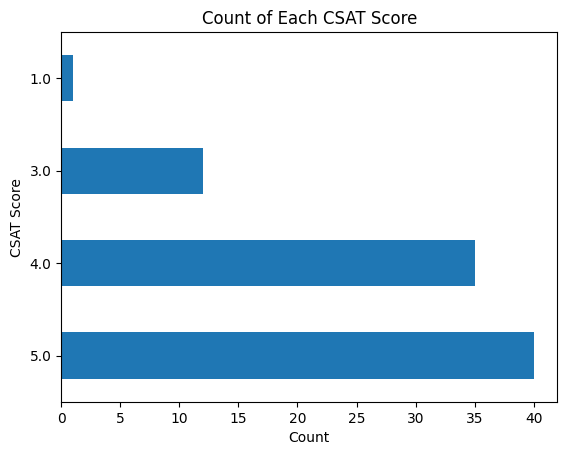

In [25]:
# Count occurrences of each CSAT score
csat_counts = df['feedback_csat'].value_counts()

# Plot the counts as a horizontal bar chart
csat_counts.plot(kind='barh', title='Count of Each CSAT Score')
plt.xlabel('Count')
plt.ylabel('CSAT Score')
plt.show()


#Sentiment Score vs. CSAT Score

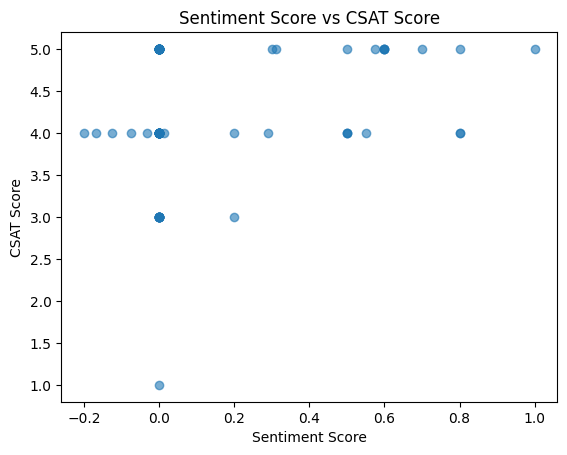

In [26]:
# Ensure sentiment analysis is done (re-run TextBlob if needed)
df['explanation_sentiment'] = df['feedback_csat_explanation'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment score against CSAT rating
plt.figure()
plt.scatter(df['explanation_sentiment'], df['feedback_csat'], alpha=0.6)
plt.title('Sentiment Score vs CSAT Score')
plt.xlabel('Sentiment Score')
plt.ylabel('CSAT Score')
plt.show()


#Top BiGrams in Feedback

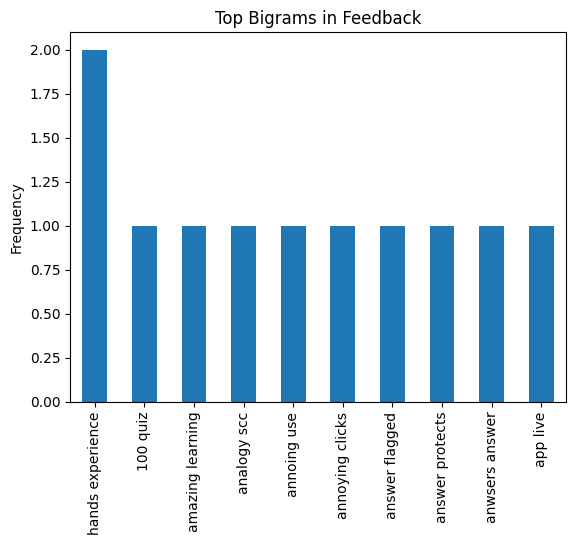

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text to find bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df['feedback_csat_explanation'].fillna(""))

# Sum bigram occurrences and create DataFrame
bigram_counts = bigrams.sum(axis=0)
bigram_df = pd.DataFrame(bigram_counts.tolist()[0], index=vectorizer.get_feature_names_out(), columns=['count'])
top_bigrams = bigram_df.nlargest(10, 'count')

# Plot top bigrams
top_bigrams.plot(kind='bar', legend=None, title='Top Bigrams in Feedback')
plt.ylabel('Frequency')
plt.show()


#Averge CSAT by Month

In [29]:
# Resample by month and calculate mean for each CSAT category
monthly_averages = df.resample('M').mean()[['feedback_csat', 'feedback_csat_lab_quality',
                                            'feedback_csat_lecture_quality', 'feedback_csat_materials']]

# Plot each CSAT category as a grouped bar chart
monthly_averages.plot(kind='bar', figsize=(10, 6), title='Average CSAT by Month')
plt.xlabel('Month')
plt.ylabel('Average CSAT Score')
plt.legend(title='CSAT Category')
plt.show()


<ipython-input-29-dab12fbbeeb3>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_averages = df.resample('M').mean()[['feedback_csat', 'feedback_csat_lab_quality',


TypeError: agg function failed [how->mean,dtype->object]

#Distribution of Sentiment Scores

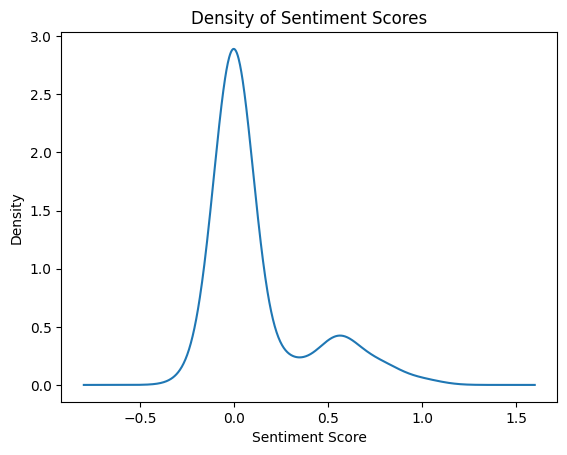

In [30]:
# Plot KDE for sentiment scores
plt.figure()
df['explanation_sentiment'].plot(kind='kde', title='Density of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()


# Word Cloud for Lab Quality Feedback

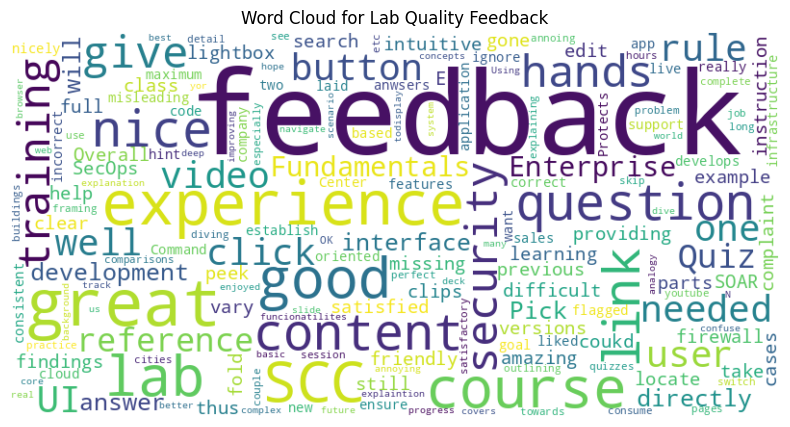

In [31]:
from wordcloud import WordCloud

# Filter for lab quality feedback and generate text for word cloud
lab_feedback_text = ' '.join(df[df['feedback_csat_lab_quality'].notna()]['feedback_csat_explanation'].fillna(""))

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lab_feedback_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lab Quality Feedback')
plt.show()


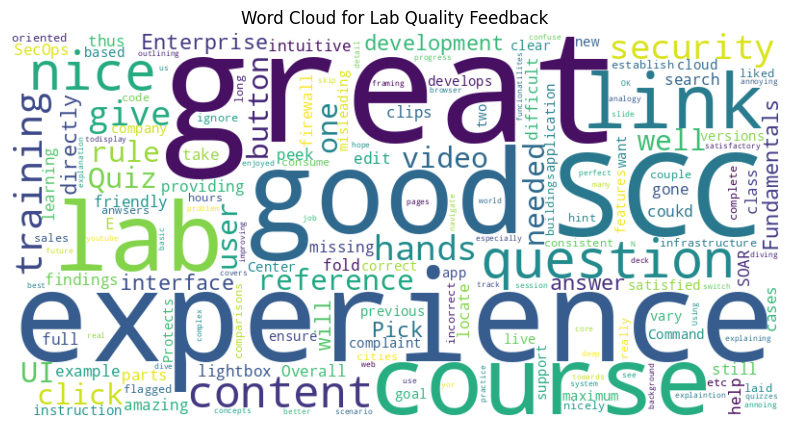

In [32]:
from wordcloud import WordCloud, STOPWORDS

# Add "feedback" to the list of stopwords
stopwords = set(STOPWORDS)
stopwords.add("feedback")  # Add other domain-specific terms if needed

# Filter text for lab quality feedback only
lab_feedback_text = ' '.join(df[df['feedback_csat_lab_quality'].notna()]['feedback_csat_explanation'].fillna(""))

# Generate the word cloud, using the updated stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(lab_feedback_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lab Quality Feedback')
plt.show()


#BERt Stuff

In [33]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

# Load the pre-trained BERT model and tokenizer for sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to predict sentiment
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits).item()
    sentiment = "positive" if predicted_class == 1 else "negative"
    return sentiment

# Apply sentiment analysis to 'feedback_csat_explanation' and 'feedback_csat_open_feedback' columns
df['explanation_sentiment'] = df['feedback_csat_explanation'].apply(lambda x: get_sentiment(str(x)))
df['open_feedback_sentiment'] = df['feedback_csat_open_feedback'].apply(lambda x: get_sentiment(str(x)))

# View the sentiment analysis results
print(df[['feedback_csat_explanation', 'explanation_sentiment', 'feedback_csat_open_feedback', 'open_feedback_sentiment']])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

                                       feedback_csat_explanation  \
feedback_date                                                      
2024-03-14                                           No feedback   
2024-03-29     The UI for SCC is not very user friendly or in...   
2024-03-30                          satisfied with the knowledge   
2024-04-01                                           No feedback   
2024-04-02                                           No feedback   
...                                                          ...   
2024-09-08                                                   N.A   
2024-09-09     Give me a basic background, I hope it will giv...   
2024-09-15                                           No feedback   
2024-09-17                                           No feedback   
2024-10-03                                           No feedback   

              explanation_sentiment  \
feedback_date                         
2024-03-14                 negative  

In [ ]:
#

In [43]:
#Get a Star Rating

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

# Load pre-trained BERT model fine-tuned for star rating
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to predict star rating
def get_star_rating(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_star = torch.argmax(logits).item() + 1  # Ratings are 0-indexed, so add 1
    return predicted_star

# Apply star rating to 'feedback_csat_explanation' and 'feedback_csat_open_feedback' columns
df['explanation_star_rating'] = df['feedback_csat_explanation'].apply(lambda x: get_star_rating(str(x)))
df['open_feedback_star_rating'] = df['feedback_csat_open_feedback'].apply(lambda x: get_star_rating(str(x)))

# View the star ratings
print(df[['feedback_csat_explanation', 'explanation_star_rating', 'feedback_csat_open_feedback', 'open_feedback_star_rating']])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                       feedback_csat_explanation  \
feedback_date                                                      
2024-03-14                                           No feedback   
2024-03-29     The UI for SCC is not very user friendly or in...   
2024-03-30                          satisfied with the knowledge   
2024-04-01                                           No feedback   
2024-04-02                                           No feedback   
...                                                          ...   
2024-09-08                                                   N.A   
2024-09-09     Give me a basic background, I hope it will giv...   
2024-09-15                                           No feedback   
2024-09-17                                           No feedback   
2024-10-03                                           No feedback   

               explanation_star_rating  \
feedback_date                            
2024-03-14                     

In [45]:
# Display a sample of the DataFrame with feedback and star ratings
display_columns = ['feedback_csat_explanation', 'explanation_star_rating',
                   'feedback_csat_open_feedback', 'open_feedback_star_rating']

# Display the first few rows of the selected columns as a table
print(df[display_columns].head(10))


                                       feedback_csat_explanation  \
feedback_date                                                      
2024-03-14                                           No feedback   
2024-03-29     The UI for SCC is not very user friendly or in...   
2024-03-30                          satisfied with the knowledge   
2024-04-01                                           No feedback   
2024-04-02                                           No feedback   
2024-04-02                           amazing learning experience   
2024-04-04     Overall this class was good, but it was missin...   
2024-04-11                                           No feedback   
2024-04-14                                           No feedback   
2024-04-15     There are some parts of the training that are ...   

               explanation_star_rating  \
feedback_date                            
2024-03-14                           1   
2024-03-29                           2   
2024-03-30     

In [46]:
#Create a summary table

# Summary table for explanation and open feedback ratings
summary_table = pd.DataFrame({
    "Mean Explanation Star Rating": [df['explanation_star_rating'].mean()],
    "Mean Open Feedback Star Rating": [df['open_feedback_star_rating'].mean()],
    "Explanation Rating Distribution": [df['explanation_star_rating'].value_counts().to_dict()],
    "Open Feedback Rating Distribution": [df['open_feedback_star_rating'].value_counts().to_dict()]
})

print(summary_table)


   Mean Explanation Star Rating  Mean Open Feedback Star Rating  \
0                      1.876404                        1.539326   

   Explanation Rating Distribution Open Feedback Rating Distribution  
0  {1: 62, 4: 9, 5: 9, 3: 6, 2: 3}         {1: 72, 3: 8, 5: 5, 4: 4}  


In [47]:
#Display Table

from tabulate import tabulate

# Using tabulate for console-based pretty print
print(tabulate(df[display_columns].head(10), headers="keys", tablefmt="pretty"))


+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------+
|    feedback_date    |                                                                                                                                                                     feedback_csat_explanation                           

In [48]:

from tabulate import tabulate

# Define display columns with star ratings and feedback text
display_columns = ['feedback_csat_explanation', 'explanation_star_rating',
                   'feedback_csat_open_feedback', 'open_feedback_star_rating']

# Truncate long feedback text for better readability
df_wrapped = df[display_columns].copy()
df_wrapped['feedback_csat_explanation'] = df_wrapped['feedback_csat_explanation'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))
df_wrapped['feedback_csat_open_feedback'] = df_wrapped['feedback_csat_open_feedback'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))

# Convert DataFrame to Markdown format with word wrapping
markdown_table = tabulate(df_wrapped.head(10), headers="keys", tablefmt="pipe")

print(markdown_table)


| feedback_date       | feedback_csat_explanation                          |   explanation_star_rating | feedback_csat_open_feedback                        |   open_feedback_star_rating |
|:--------------------|:---------------------------------------------------|--------------------------:|:---------------------------------------------------|----------------------------:|
| 2024-03-14 00:00:00 | No feedback                                        |                         1 | Skin zone Greg                                     |                           3 |
| 2024-03-29 00:00:00 | The UI for SCC is not very user friendly or intuit |                         2 | I learn best by doing, so I would have preferred t |                           3 |
|                     | ive and thus it was difficult to search for what l |                           | he entire education be primarily within a lab envi |                             |
|                     | inks or buttons I needed to click. T

In [42]:
from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')# Load DistilBERT sentiment analysis pipeline
sentiment_analysis_bert = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Iterate over the rows and perform sentiment analysis with DistilBERT
sentiment_results_bert = []
for index, row in df.iterrows():
    text = row[0]  # Access the first (and only) column in each row
    bert_result = sentiment_analysis_bert(text)[0]
    sentiment_label_bert = bert_result['label']
    sentiment_score_bert = bert_result['score']
    sentiment_results_bert.append({"Text": text, "Sentiment Score": sentiment_score_bert, "Sentiment Label": sentiment_label_bert})


# Iterate over the sentiment results and print each entry
for result in sentiment_results_bert:
    print(f"Text: {result['Text']}")
    print(f"Sentiment Score: {result['Sentiment Score']}")
    print(f"Sentiment Label: {result['Sentiment Label']}")
    print()  # Add a blank line for readability

# Convert DistilBERT sentiment results to DataFrame
sentiment_df_bert = pd.DataFrame(sentiment_results_bert)

# Save DistilBERT sentiment results to a new CSV file
sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

<ipython-input-42-50c4a6bc894a>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = row[0]  # Access the first (and only) column in each row


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [39]:
sentiment_df_bert.head()

NameError: name 'sentiment_df_bert' is not defined

#### 3.3.1 NEW: Let's add code to convert the column names to lowercase

In [8]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

#Replace Spaces with Underscores
df.columns = df.columns.str.replace(' ', '_')


#### 3.3.2 NEW: Let's add code to replace spaces with underscores.

In [10]:
# Replaces spaces with underscores.

df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   feedback_feedback_date_date        89 non-null     object 
 1   feedback_csat                      88 non-null     float64
 2   feedback_csat_explanation          29 non-null     object 
 3   feedback_csat_lab_quality          79 non-null     float64
 4   feedback_csat_lecture_quality      80 non-null     float64
 5   feedback_csat_open_feedback        20 non-null     object 
 6   feedback_csat_materials            0 non-null      float64
 7   feedback_csat_lab_lecture_balance  80 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.7+ KB


### 3.4 Show the DataFrame shape

The .shape() method gives you the number of rows and columns in the dataset. You can also see this information in the df.info() outupt.

In [11]:
df.shape

(89, 8)

### 3.5 Show the data types

Show DataFrame data types. Although the df.info() provides this information, it is good to see the column datatypes on their own.

In [12]:
df.dtypes

,0
feedback_feedback_date_date,object
feedback_csat,float64
feedback_csat_explanation,object
feedback_csat_lab_quality,float64
feedback_csat_lecture_quality,float64
feedback_csat_open_feedback,object
feedback_csat_materials,float64
feedback_csat_lab_lecture_balance,float64


### 3.6 Show DataFrame statistics

The describe() method computes and displays summary statistics for the dataset.

In [13]:
df.describe()

,feedback_csat,feedback_csat_lab_quality,feedback_csat_lecture_quality,feedback_csat_materials,feedback_csat_lab_lecture_balance
count,88.000000,79.000000,80.000000,0.0,80.000000
mean,4.284091,4.265823,4.325000,NaN,3.250000
std,0.787092,0.901692,0.775821,NaN,0.605878
min,1.000000,1.000000,2.000000,NaN,1.000000
25%,4.000000,4.000000,4.000000,NaN,3.000000
50%,4.000000,5.000000,4.500000,NaN,3.000000
75%,5.000000,5.000000,5.000000,NaN,3.000000
max,5.000000,5.000000,5.000000,NaN,5.000000


Below is bar charts that plots the disribution of each numerical column.

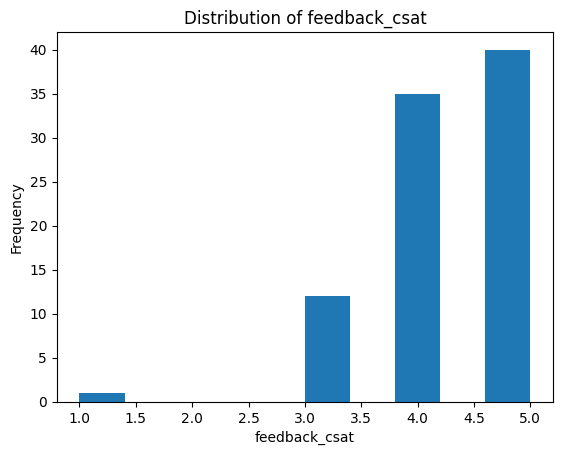

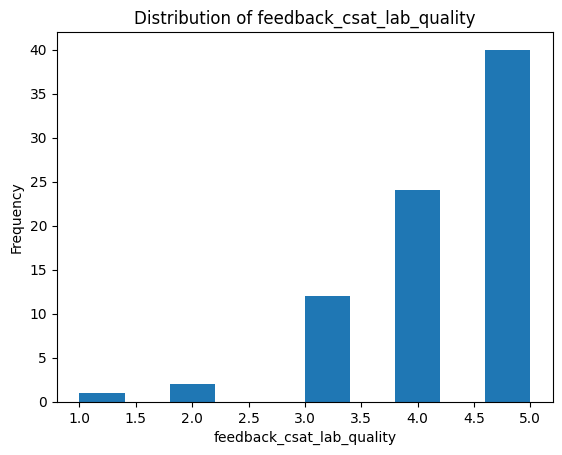

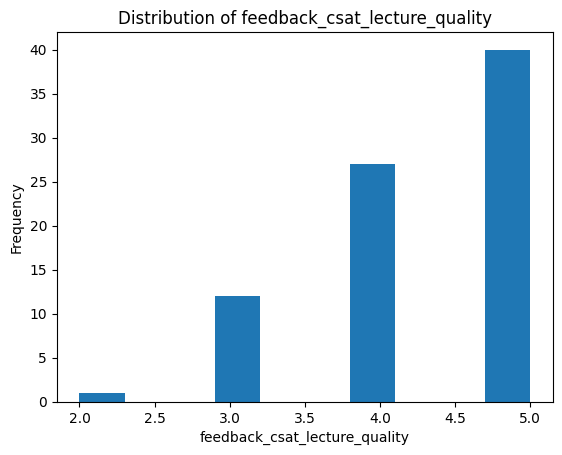

Skipping feedback_csat_materials as it contains only NaN values after cleaning.


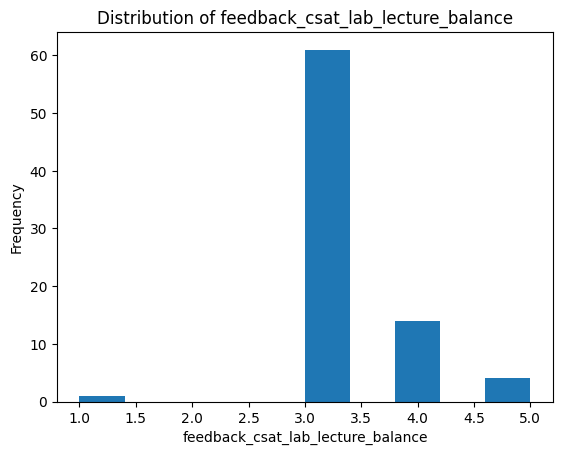

In [16]:
# Extracting numerical columns
# numeric_columns = df.columns[ df.dtypes!='object']


# Extracting numerical columns
numeric_columns = df.columns[df.dtypes != 'object']

# Plotting the distribution of each numerical column
for col in numeric_columns:
    # Remove NaN values before plotting
    data_to_plot = df[col].dropna()

    # Check if there's any data left to plot after removing NaN
    if len(data_to_plot) > 0:
        plt.hist(data_to_plot)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        print(f"Skipping {col} as it contains only NaN values after cleaning.")


### 3.7 Check for duplicate values

Checking for duplicates helps identify rows that are exact copies of others. These duplicates can arise from data entry errors, merging datasets, or repeated measurements.

In [17]:
df.duplicated().sum()

0

### 3.8 Check for Missing (Null) Values

You probably saw null values in the a column when your reviewed the df.info() output. Here is the .isnull() method, which shows you any null values in the dataset as well.

In [18]:
df.isnull().sum()

,0
feedback_feedback_date_date,0
feedback_csat,1
feedback_csat_explanation,60
feedback_csat_lab_quality,10
feedback_csat_lecture_quality,9
feedback_csat_open_feedback,69
feedback_csat_materials,89
feedback_csat_lab_lecture_balance,9


#### 3.8.1 Visualize the missing values

<Axes: >

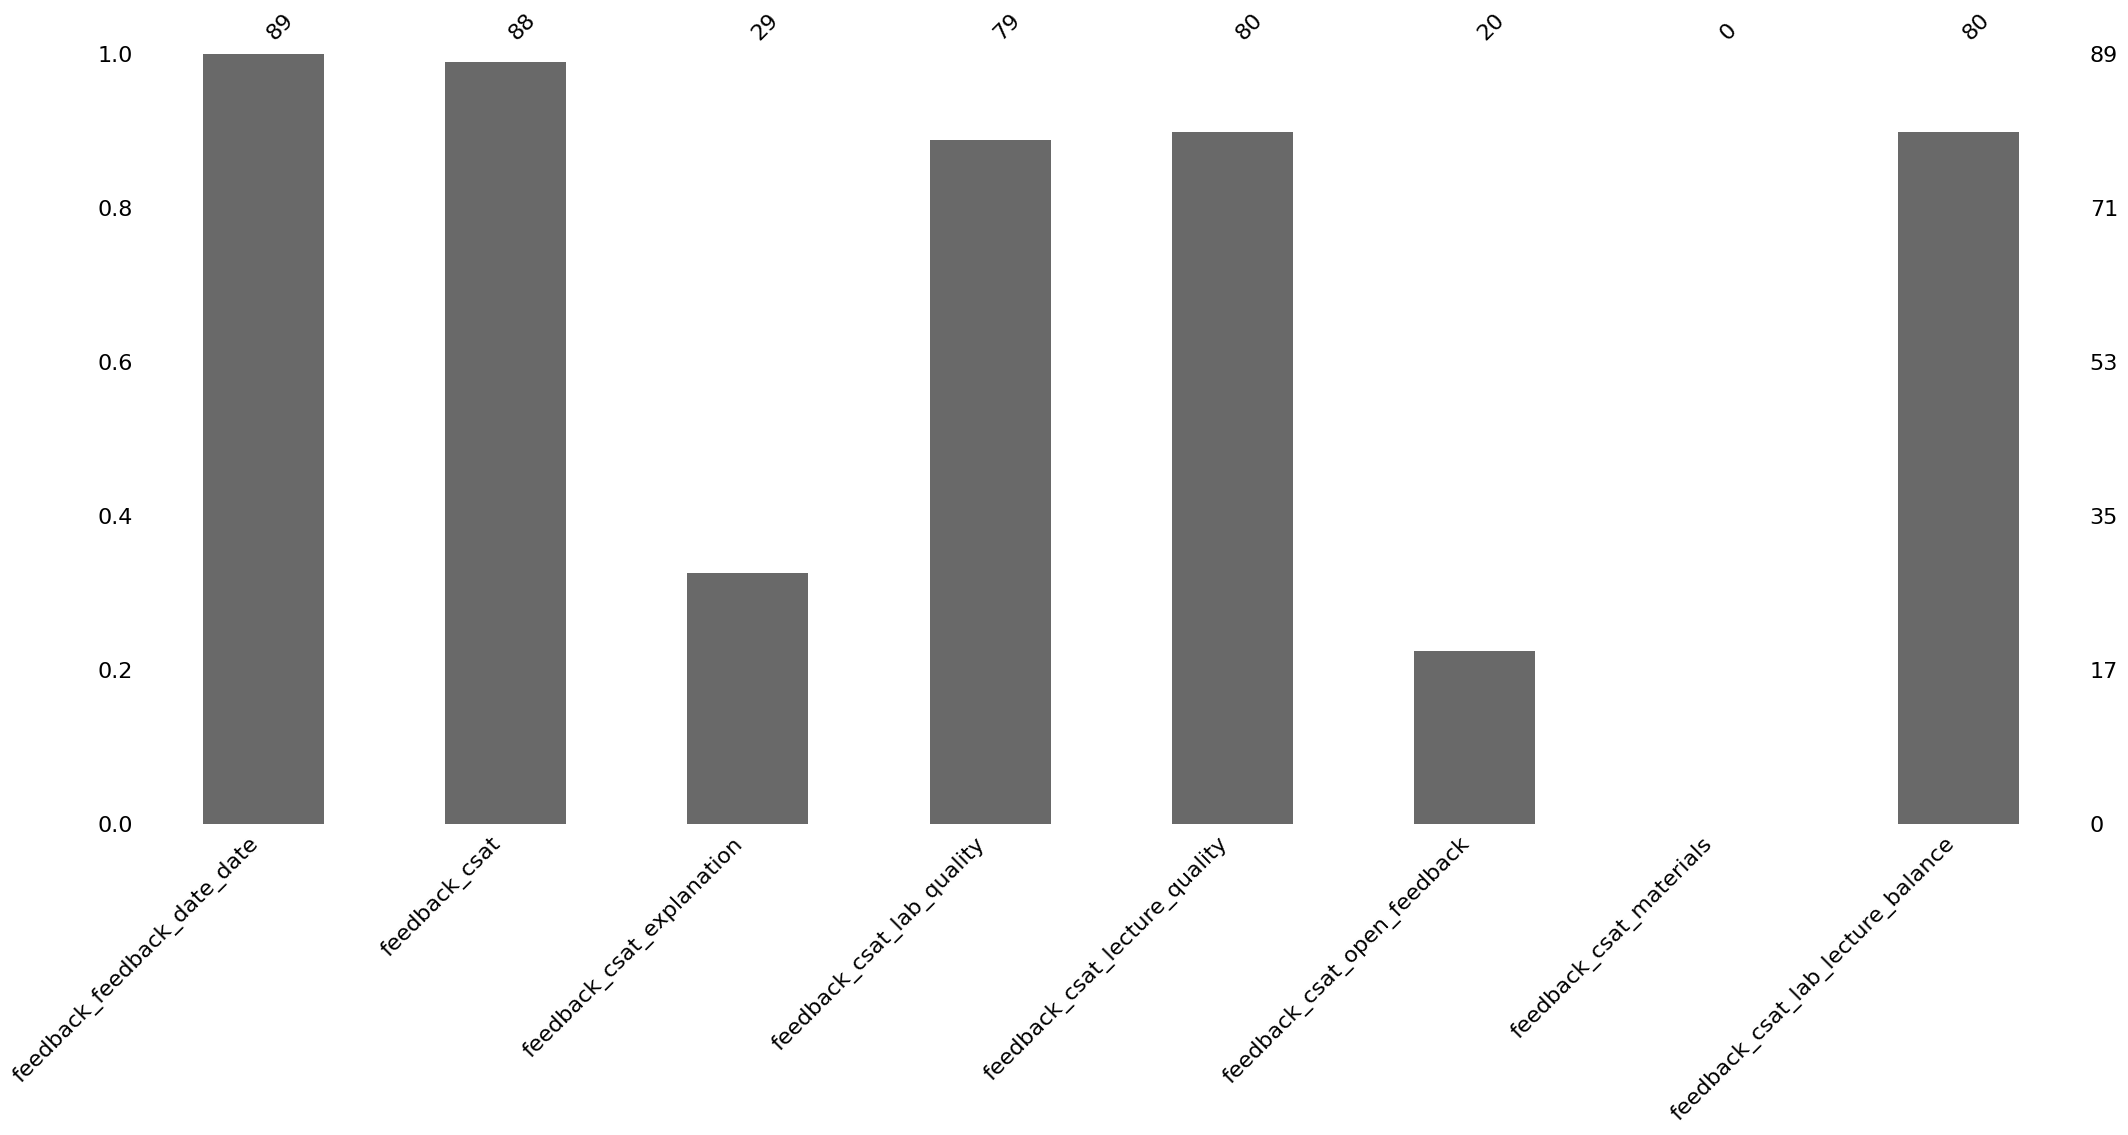

In [19]:
# Add the msno library to visualize the missing values

import missingno as msno

msno.bar(df)

# Data Preprocessing

## Step 1.  Handle Missing Values

Data Understanding:

Note:  We have made this dataset intentionally "messy" when it comes to missing values. Before filling missing values, understand why data might be missing and whether imputation could bias your analyses.


**Methods**

Use methods such as mean/median imputation, forward/backward fill, or dropping missing values depending on the context.

In [21]:
# Let's see information on the DataFrame again.
# Total row count is 7,043.
# Note both objects, integers, and floats have missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   feedback_feedback_date_date        89 non-null     object 
 1   feedback_csat                      88 non-null     float64
 2   feedback_csat_explanation          29 non-null     object 
 3   feedback_csat_lab_quality          79 non-null     float64
 4   feedback_csat_lecture_quality      80 non-null     float64
 5   feedback_csat_open_feedback        20 non-null     object 
 6   feedback_csat_materials            0 non-null      float64
 7   feedback_csat_lab_lecture_balance  80 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.7+ KB


Let's show the number of missing values for numbers and objects.

In [22]:
# Calculate missing values for numeric and object columns
missing_values_numeric = df.select_dtypes(include=['number']).isnull().sum()
missing_values_object = df.select_dtypes(include=['object']).isnull().sum()

# Display the results
print("Missing values in numeric columns:")
print(missing_values_numeric)
print("\nMissing values in object columns:")
print(missing_values_object)

Missing values in numeric columns:
feedback_csat                         1
feedback_csat_lab_quality            10
feedback_csat_lecture_quality         9
feedback_csat_materials              89
feedback_csat_lab_lecture_balance     9
dtype: int64

Missing values in object columns:
feedback_feedback_date_date     0
feedback_csat_explanation      60
feedback_csat_open_feedback    69
dtype: int64


In [25]:
# Put the columns that need to be filled in.

categorical_columns = ['feedback_feedback_date_date',
       'feedback_csat_explanation', 'feedback_csat_open_feedback']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # mode()[0] to get the most common value

<ipython-input-25-03989f41b900>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)  # mode()[0] to get the most common value


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   feedback_feedback_date_date        89 non-null     object 
 1   feedback_csat                      88 non-null     float64
 2   feedback_csat_explanation          89 non-null     object 
 3   feedback_csat_lab_quality          79 non-null     float64
 4   feedback_csat_lecture_quality      80 non-null     float64
 5   feedback_csat_open_feedback        89 non-null     object 
 6   feedback_csat_materials            0 non-null      float64
 7   feedback_csat_lab_lecture_balance  80 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.7+ KB


In [27]:
# Run this cell to confirm that all missing values are filled.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   feedback_feedback_date_date        89 non-null     object 
 1   feedback_csat                      88 non-null     float64
 2   feedback_csat_explanation          89 non-null     object 
 3   feedback_csat_lab_quality          79 non-null     float64
 4   feedback_csat_lecture_quality      80 non-null     float64
 5   feedback_csat_open_feedback        89 non-null     object 
 6   feedback_csat_materials            0 non-null      float64
 7   feedback_csat_lab_lecture_balance  80 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.7+ KB


<Axes: >

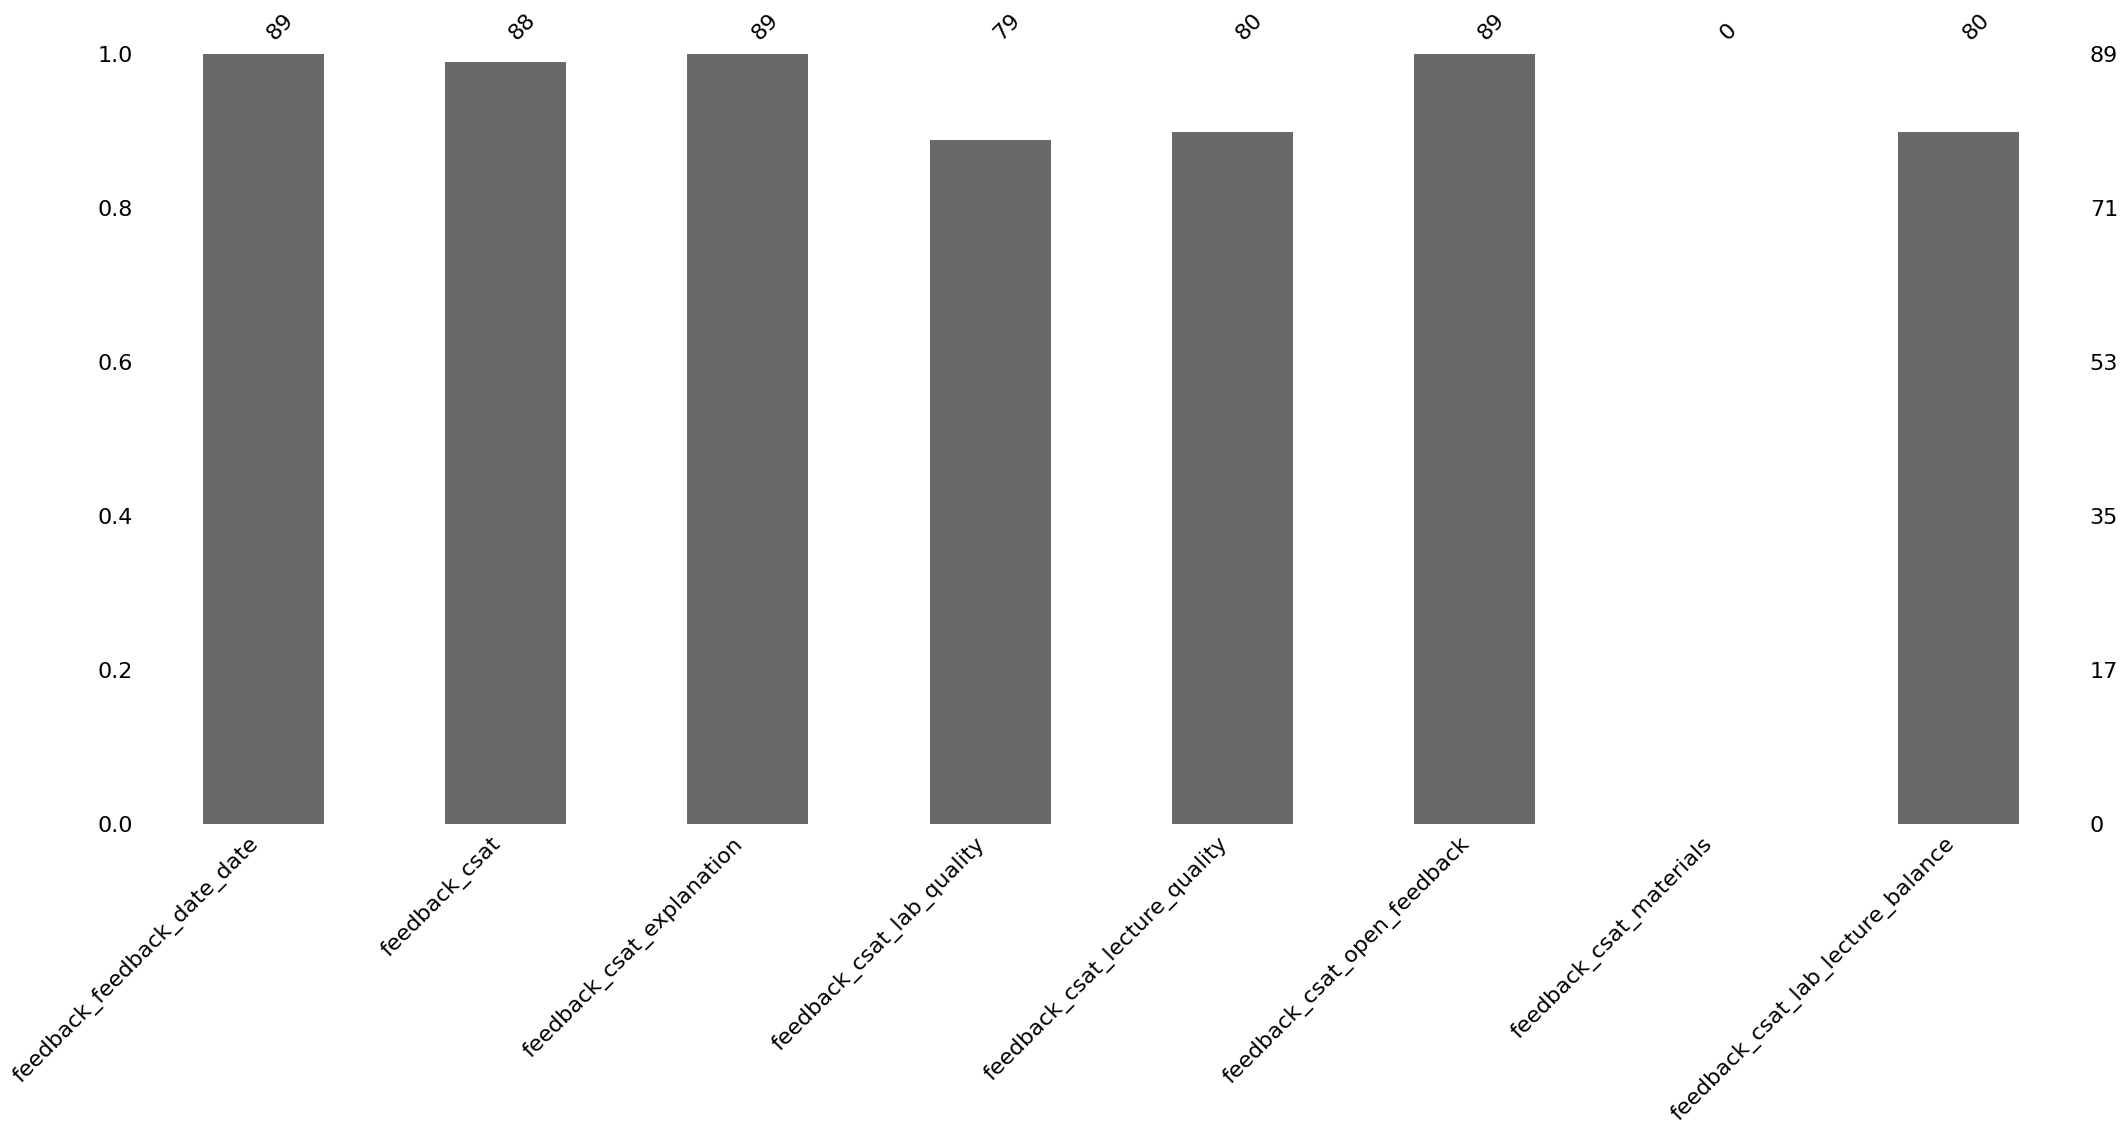

In [28]:

msno.bar(df)

## Step 2. No duplicate values

In [ ]:
df.duplicated().sum()

## Step 3. Handle Data Type Inconsistency

Convert columns to appropriate data types using methods like astype() in Pandas.


Zip Code has the incorrect data type. It is shown as an integer - it is not a number. In data processing and analytics, zip codes are often not treated as integers or numeric values, even though they consist of digits. See the course lesson on why this is the case.

In [ ]:
# Enter the code to convert the 'zip_code" column to an object (string)

df['zip_code'] = df['zip_code'].astype(str)

# Enter the code to check the data type of the zip code column

print(df['zip_code'].dtype)

## Step 4. Handle Outliers

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset. Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

The results below are from our initial datacheck.

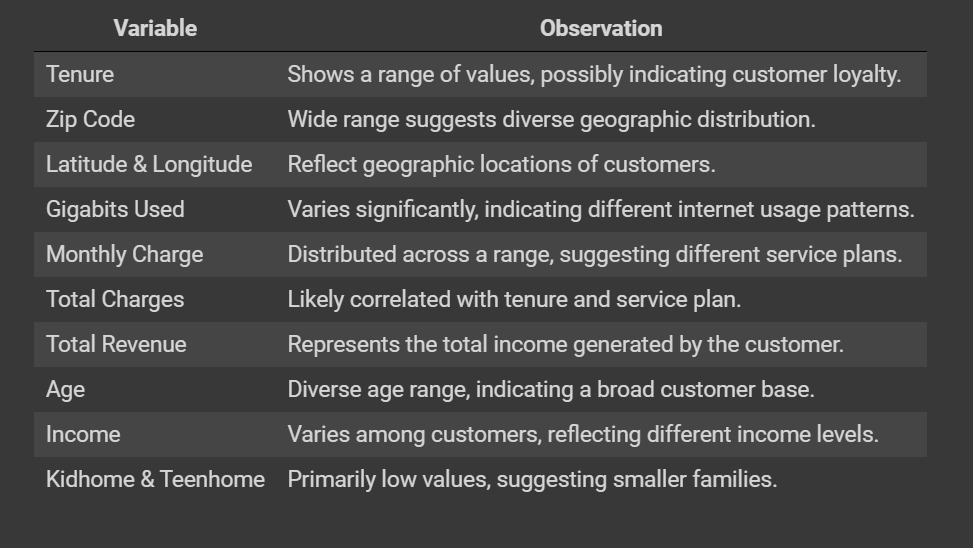

Let's create a z-score for the total revenue column, since it is one of the features that we'll need to calculate Customer Lifetime Value.

In [ ]:
# Create a z-score for the column 'total_revenue'

from scipy import stats # SciPy is a widely-used library for scientific and technical computing in Python. The stats module within SciPy contains a wide range of statistical functions, probability distribu

z_scores = stats.zscore(df['total_revenue'])

# Display the z-scores
z_scores

Check the rows with a z-score over 3. If there are rows with a z-score we can drop them. (Ektamaini, 2020) https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/


In [ ]:
# Check rows with a z-score over 3. A z-score A Z-score, also known as a standard score, measures how many standard deviations a data point is from the mean of the dataset. It is a way to standardize data points within a distribution, allowing for comparison across different scales or distributions.

df[(z_scores > 3)]

There are five rows with a z-score over 3.

In [ ]:
# Remove any rows with a z-score over 3 (keep rows with a z-score <3

df = df[(z_scores < 3)]


Let's check again - for rows with a z-score over 3.

In [ ]:
# Check rows with a z-score over 3. A z-score A Z-score, also known as a standard score, measures how many standard deviations a data point is from the mean of the dataset. It is a way to standardize data points within a distribution, allowing for comparison across different scales or distributions.

df[(z_scores > 3)]

No rows with a z-score over three.

In [ ]:
# Create a z-score for the column 'tenure'

from scipy import stats

z_scores = stats.zscore(df['tenure'])

# Display the z-scores
z_scores

In [ ]:
# Tenure appears to not have any outliers.

# Check rows with a z-score over 3.

df[(z_scores > 3)]

## Step 5. Encode Categorical Values

Note: After one-hot encodeing, the object fields turn into integers. See the course here for more information about one-hot encoding (or encoding categorical values).

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

In [ ]:
#NOTE: Do not include zip code. We will need Zip Code for EDA and clustering analysis.

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['customer_id', 'city', 'offer', 'phone_service',
       'multiple_lines', 'internet_service', 'internet_type',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'unlimited_data', 'contract', 'payment_method', 'gender', 'married',
       'churn']

#--------------------------------------------------------------------------
# EXERCISE STARTS HERE #

# Enter the code to apply label encoding

# Apply label encoding
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))






In [ ]:
# Verify data types adter encodiing
df.dtypes

In [ ]:
df.head()

## Step 6. Save the processed file

In [ ]:
# Save the clean file. We'll use it now for Data visualizaition and analytics.

df.to_csv('cleaned_telecom.csv', index=False)


# EXERCISES

The exercises for this challenge lab are found in the EDA section.
# EXERCISES  - Under the Exploratory Data Analysis Section
1. Bar Chart - Count how contracts are distributed
2. Pie Chart - Graph contract type by distribution
3. Scatter Chart - Graph Tenure in Months vs. Total Revenue
4. Heat Map - Enter Code to visualize feature relationships
5. Histogram - Graph a histogram of Tenure
6. Simple Feature Engineering - Create the Customer Lifetime Value
7. Save the cleaned file - code provided.

# Exploratory Data Analysis





In [ ]:
# Load the Dataset

cleaned_df=pd.read_csv('/content/cleaned_telecom.csv')

In [ ]:
cleaned_df.head()

,customer_id,tenure,city,zip_code,latitude,longitude,offer,phone_service,multiple_lines,internet_service,...,monthly_charge,total_charges,total_revenue,gender,age,married,kidhome,teenhome,income,churn
0,0,9,346,93225,34.827662,-118.999073,0,1,0,1,...,65.6,593.30,974.81,0,37,1,0,0,30507.0,0
1,1,9,368,91206,34.162515,-118.203869,0,1,1,1,...,-4.0,542.40,610.28,1,46,0,0,1,59892.0,0
2,2,4,222,92627,33.645672,-117.922613,5,1,0,1,...,73.9,280.85,415.45,1,50,0,0,1,70545.0,1
3,3,13,587,94553,38.014457,-122.115432,4,1,0,1,...,98.0,1237.85,1599.51,1,78,1,0,0,57100.0,0
4,4,3,139,93010,34.227846,-119.079903,0,1,0,1,...,83.9,267.40,289.54,0,75,1,1,1,49096.0,1


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   int64  
 1   tenure                  7038 non-null   int64  
 2   city                    7038 non-null   int64  
 3   zip_code                7038 non-null   int64  
 4   latitude                7038 non-null   float64
 5   longitude               7038 non-null   float64
 6   offer                   7038 non-null   int64  
 7   phone_service           7038 non-null   int64  
 8   multiple_lines          7038 non-null   int64  
 9   internet_service        7038 non-null   int64  
 10  internet_type           7038 non-null   int64  
 11  gigabits_used           7038 non-null   float64
 12  online_security         7038 non-null   int64  
 13  online_backup           7038 non-null   int64  
 14  device_protection_plan  7038 non-null   

## Bar Chart

Count how contracts are distributed.

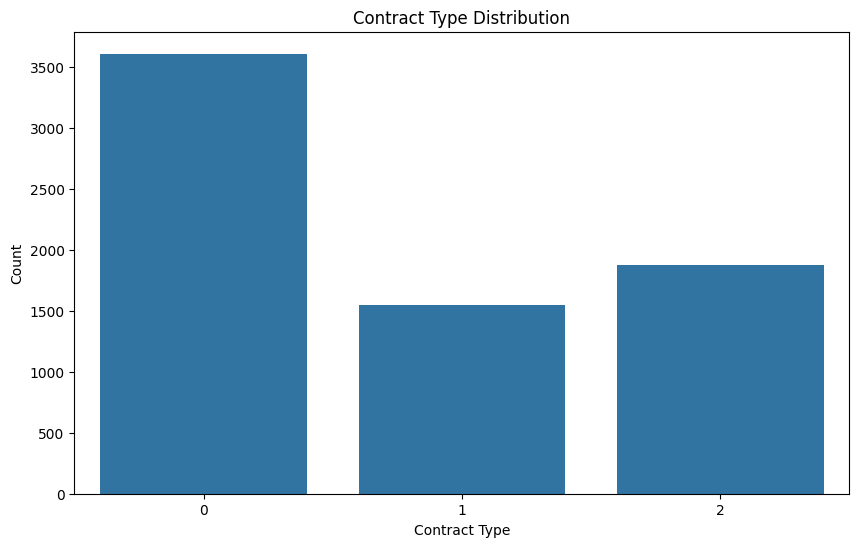

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='contract', data=df)
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

Count the frequency of each contract.

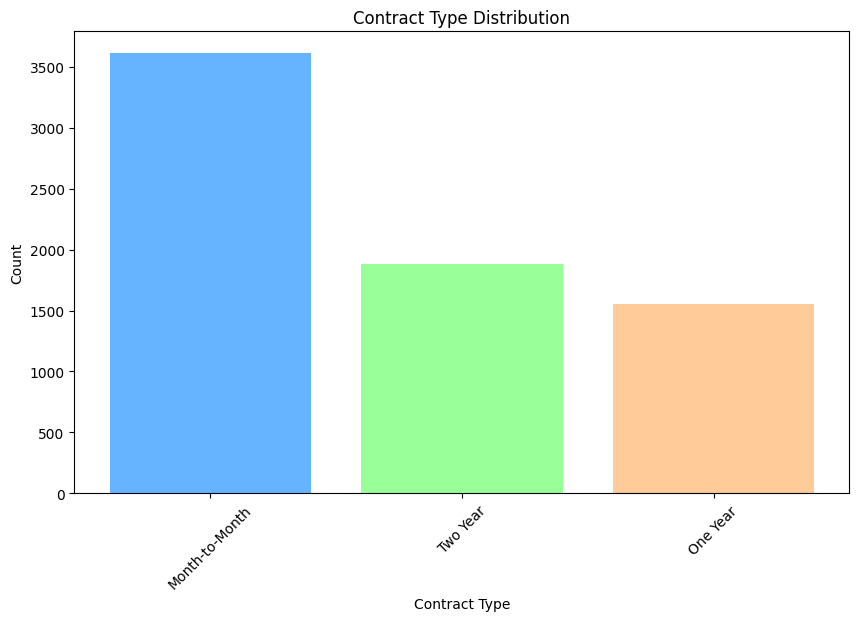

In [ ]:
# Mapping numeric values to contract type labels
contract_mapping = {0: 'Month-to-Month', 1: 'One Year', 2: 'Two Year'}
df['contract'] = df['contract'].map(contract_mapping)

# Count the frequencies of each contract type
contract_counts = df['contract'].value_counts()

# Labels for the contract types
labels = contract_counts.index

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, contract_counts, color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("Contract Type Distribution")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

Distribution of Payment Methods

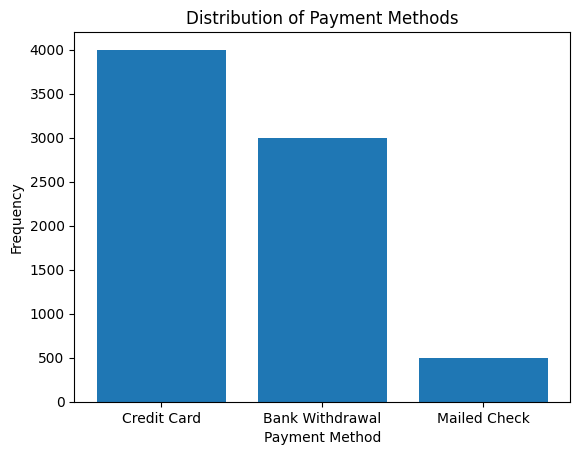

In [ ]:
# Let's examine the payment methods and their frequencies by improving the plot.

# Payment methods and their frequencies
payment_methods = [0, 1, 2]
frequencies = [4000, 3000, 500]
labels = ['Credit Card', 'Bank Withdrawal', 'Mailed Check']  # Labels corresponding to the numeric values

# Create the bar plot
plt.bar(payment_methods, frequencies, tick_label=labels)  # Assign labels to bars

# Add labels and title
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.title("Distribution of Payment Methods")

# Show the plot
plt.show()

## Pie Chart

Contract type distribution in a Pie Chart.

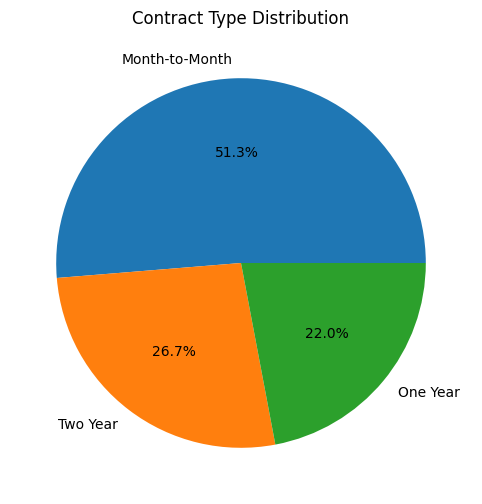

In [ ]:
# Pie Chart
plt.figure(figsize=(10, 6))
df['contract'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Contract Type Distribution')
plt.ylabel('')
plt.show()



## Scatter Plot

Tenure in Months vs. Total Revenue

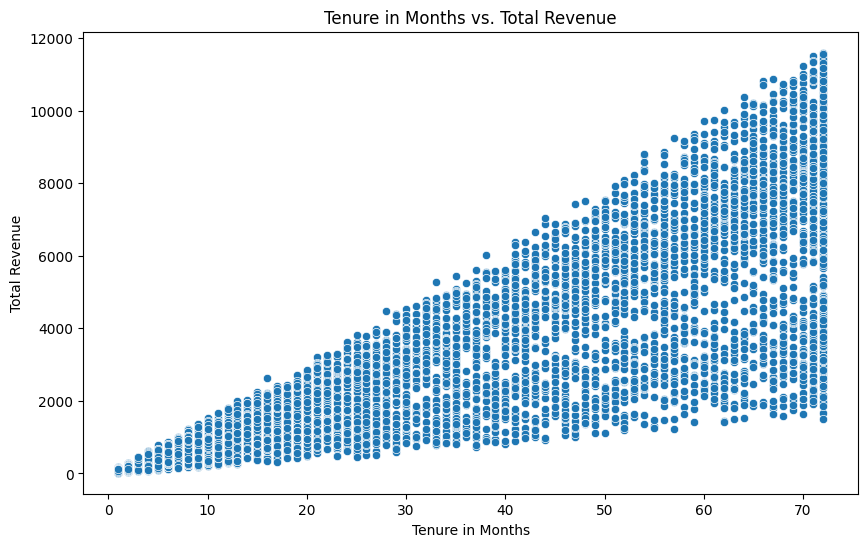

In [ ]:
# Scatter Plot


plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df['tenure'], y=cleaned_df['total_revenue'])
plt.title('Tenure in Months vs. Total Revenue')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
plt.show()

## Heat Map

Here, we do two things in one code cell. We calculate the correlation matrix and print it so that you can see the numeric values in rows and columns. To visualize these numbers, we use Seaborn.

                        customer_id    tenure      city  zip_code  latitude  \
customer_id                1.000000  0.007751  0.006751 -0.014608 -0.015163   
tenure                     0.007751  1.000000  0.016735  0.006313  0.010797   
city                       0.006751  0.016735  1.000000 -0.008032 -0.048336   
zip_code                  -0.014608  0.006313 -0.008032  1.000000  0.894737   
latitude                  -0.015163  0.010797 -0.048336  0.894737  1.000000   
longitude                  0.012790 -0.008232 -0.000818 -0.790556 -0.885953   
offer                     -0.004169 -0.325541 -0.009326 -0.014913 -0.009609   
phone_service             -0.006493  0.007903  0.003277 -0.009003 -0.019437   
multiple_lines             0.002183  0.331226  0.009686 -0.021808 -0.029253   
internet_service           0.006088  0.038018  0.006981 -0.017034 -0.033504   
internet_type             -0.015158 -0.001666  0.009363  0.000657 -0.005090   
gigabits_used             -0.004106  0.033620  0.010

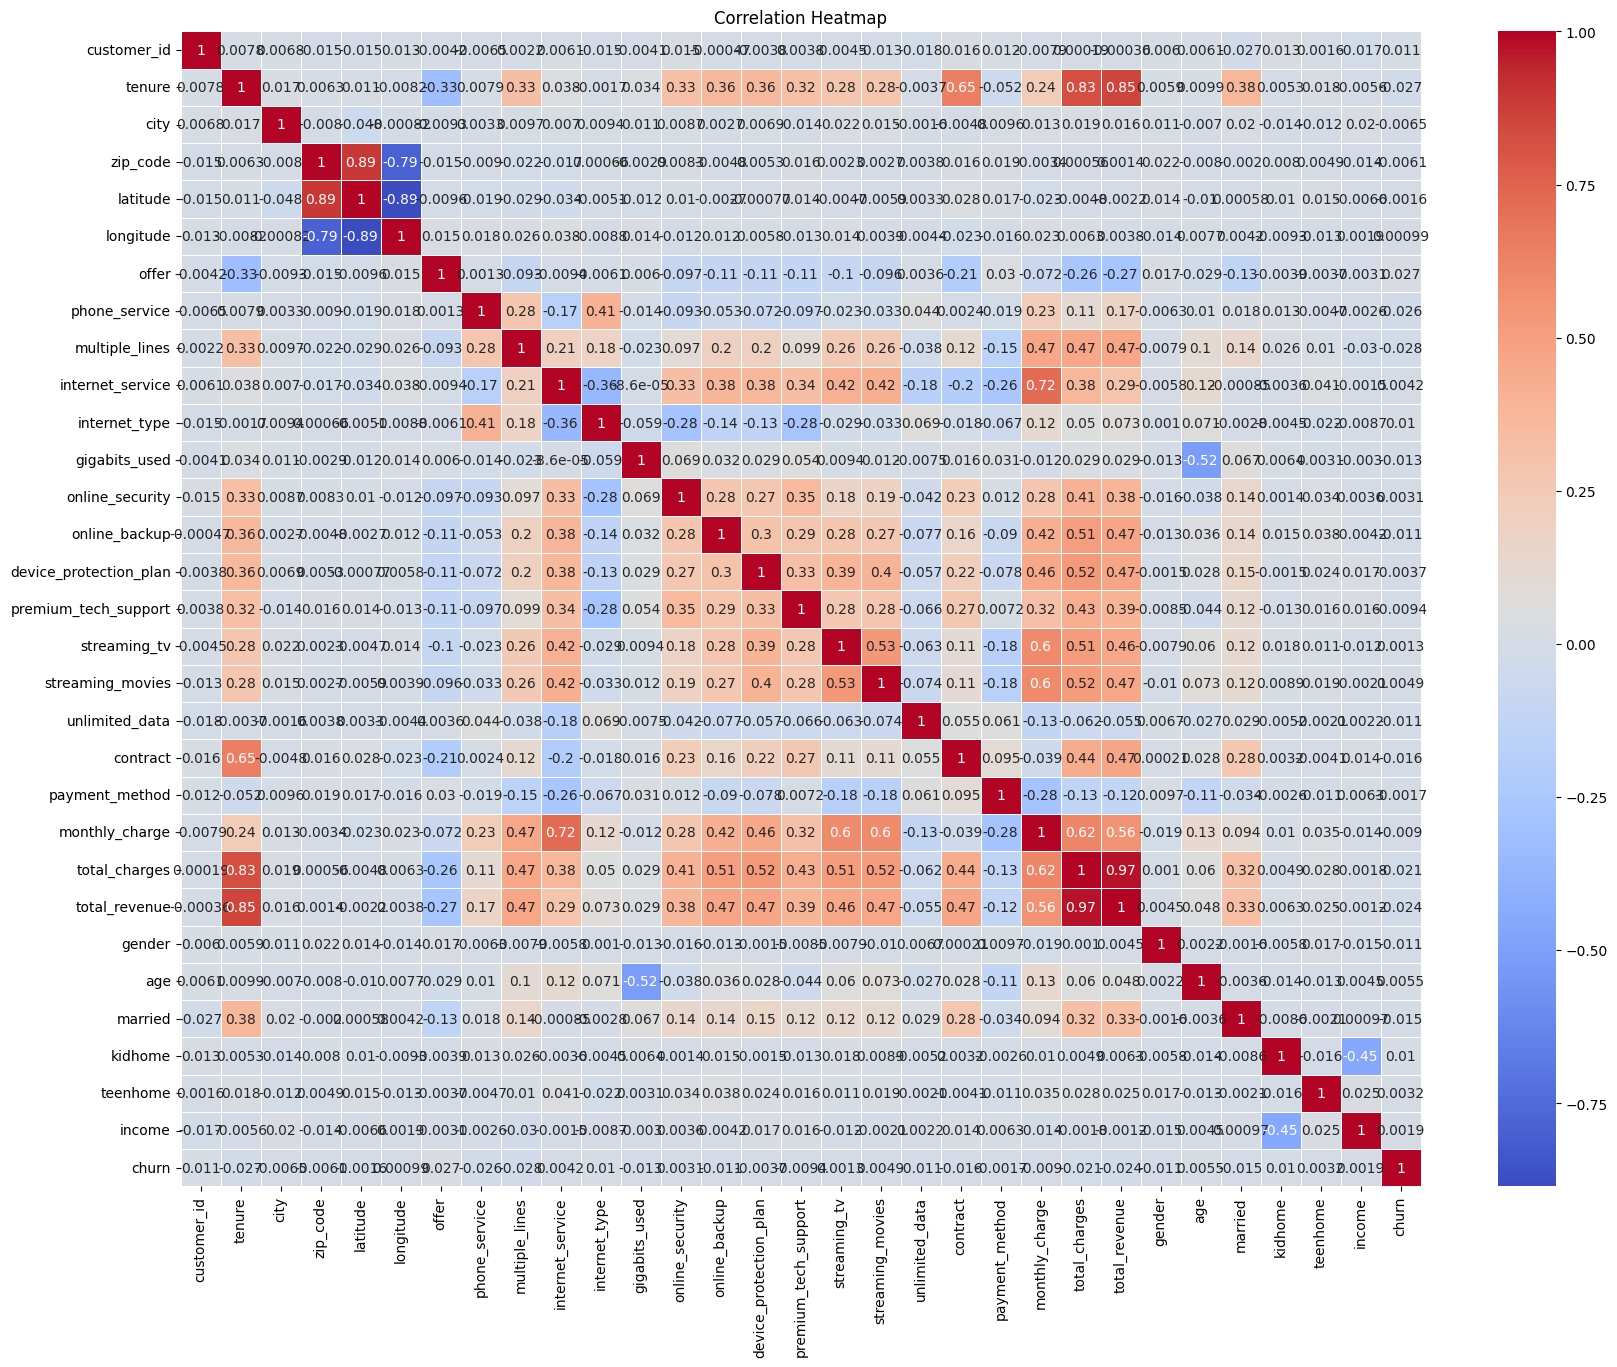

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Show the more meaningful relationships.

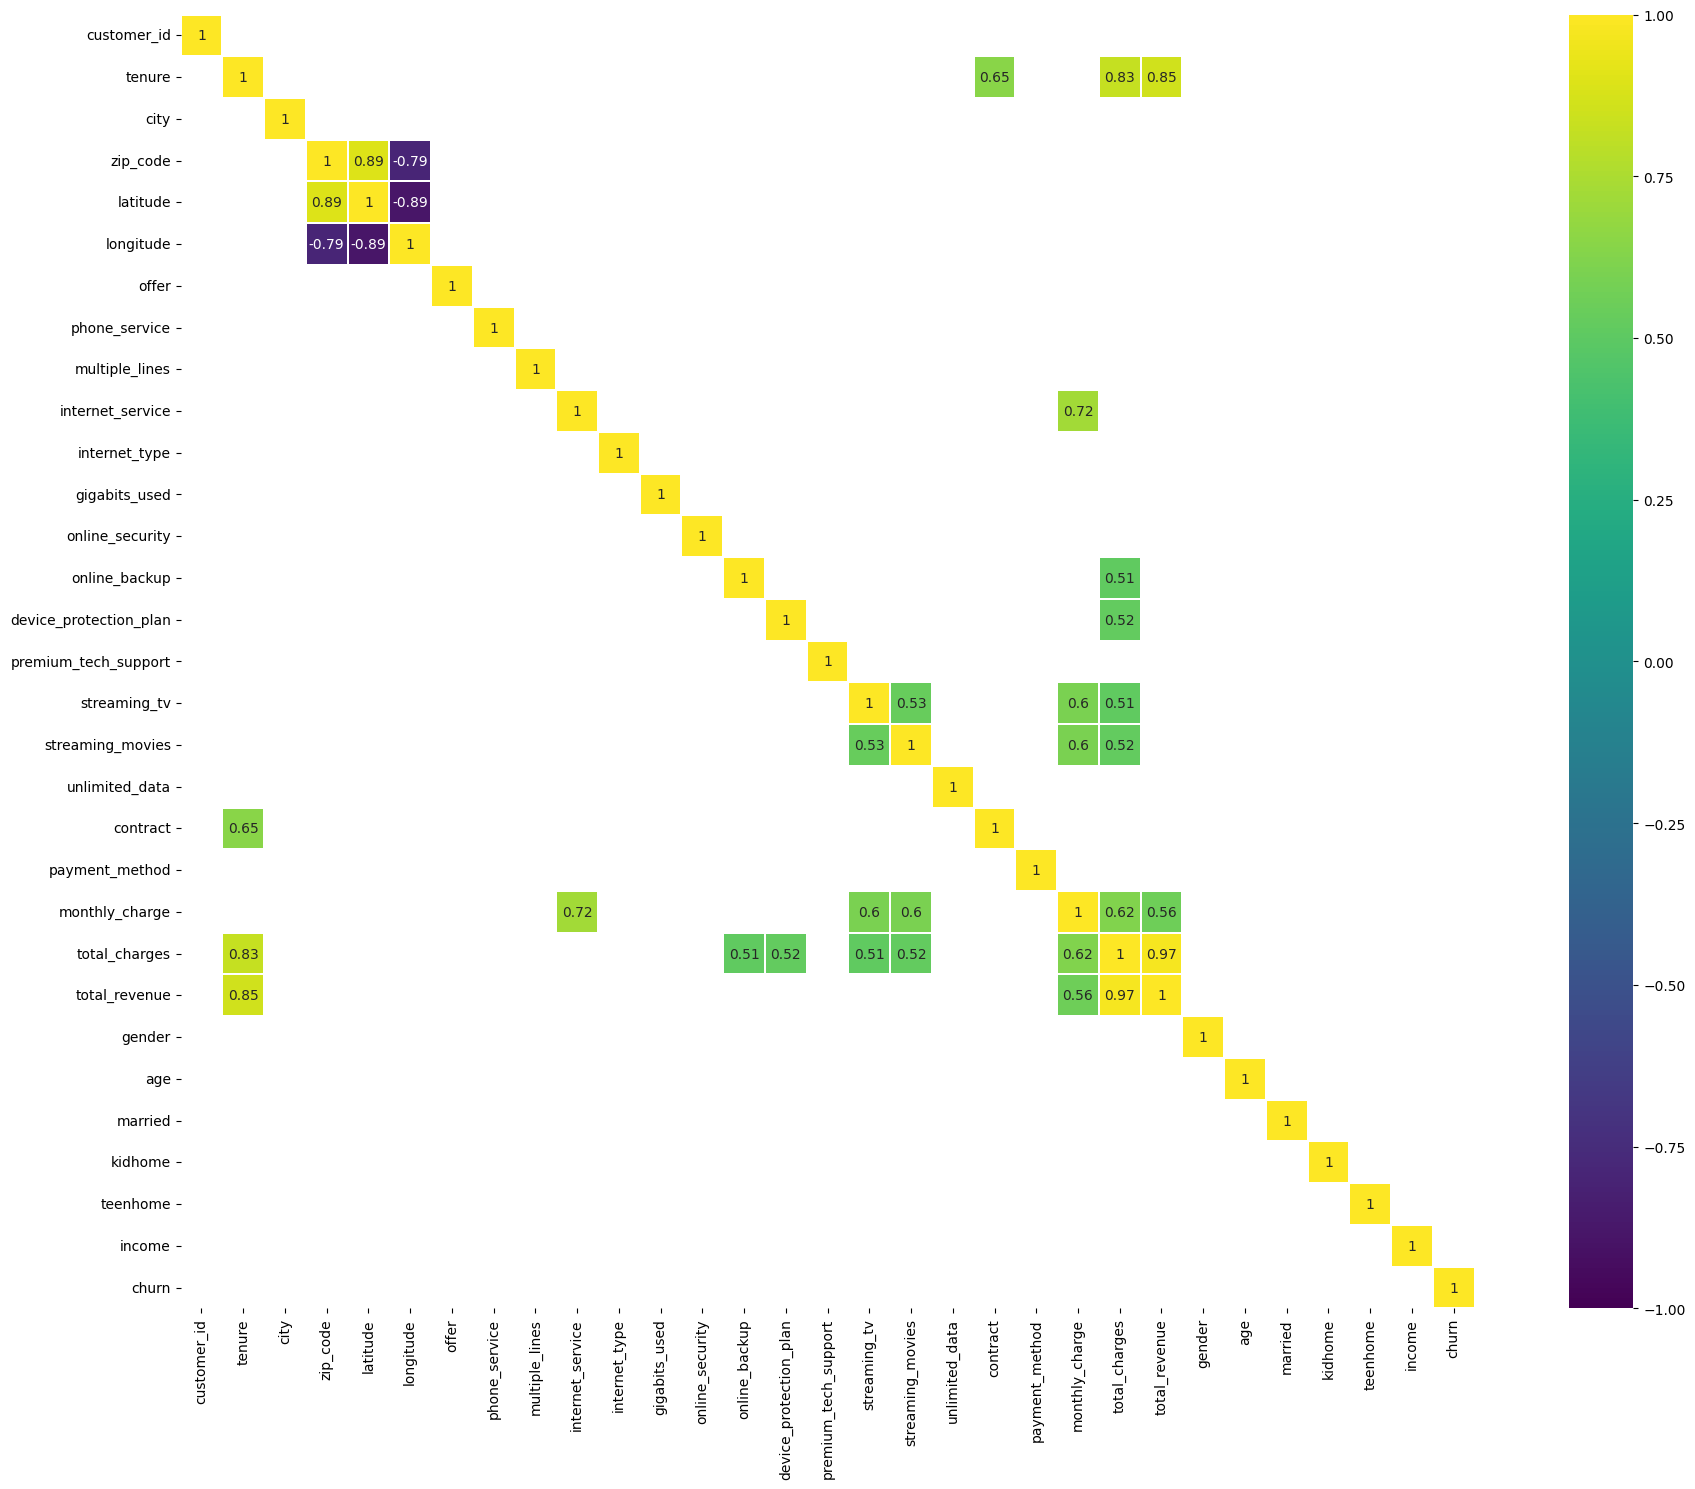

In [ ]:
# Calculate the correlation matrix
corr = cleaned_df.corr()

plt.figure(figsize=(20, 15))  # Adjust the size as needed
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True)
plt.tight_layout()
plt.show()

## Histogram

Histogram of Monthly Charges

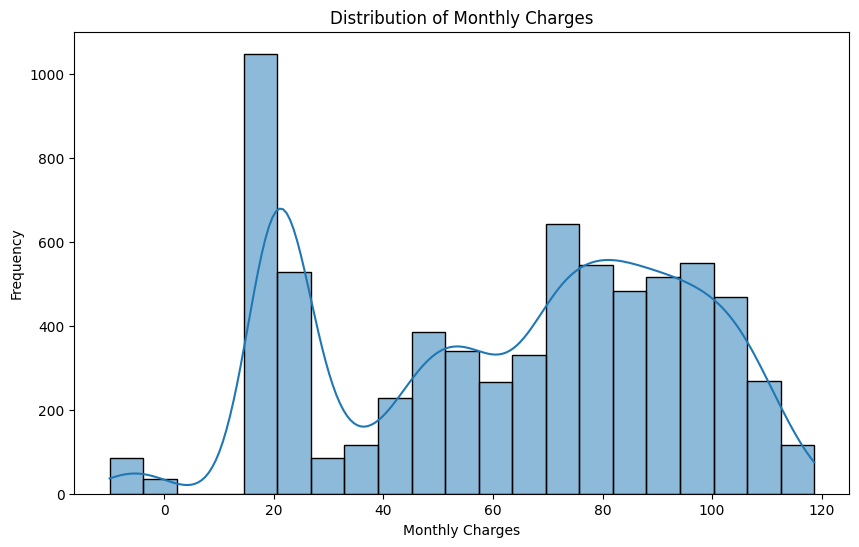

In [ ]:
# Histogram  with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['monthly_charge'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

Histogram of Tenure

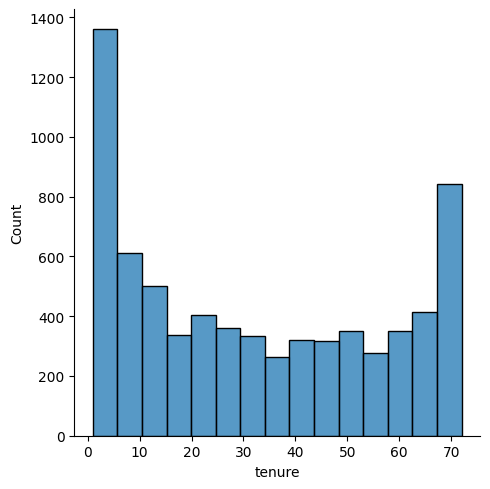

In [ ]:
# Histogram of Tenure
sns.displot(cleaned_df['tenure'])


Distribution plot of revenue

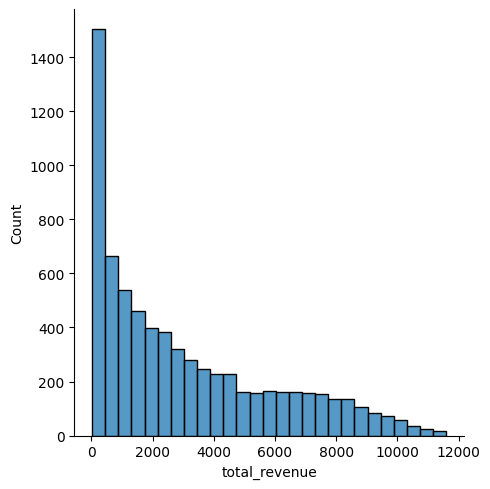

In [ ]:
# Distribution Plot

# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(cleaned_df['total_revenue'])

Churn Distribution

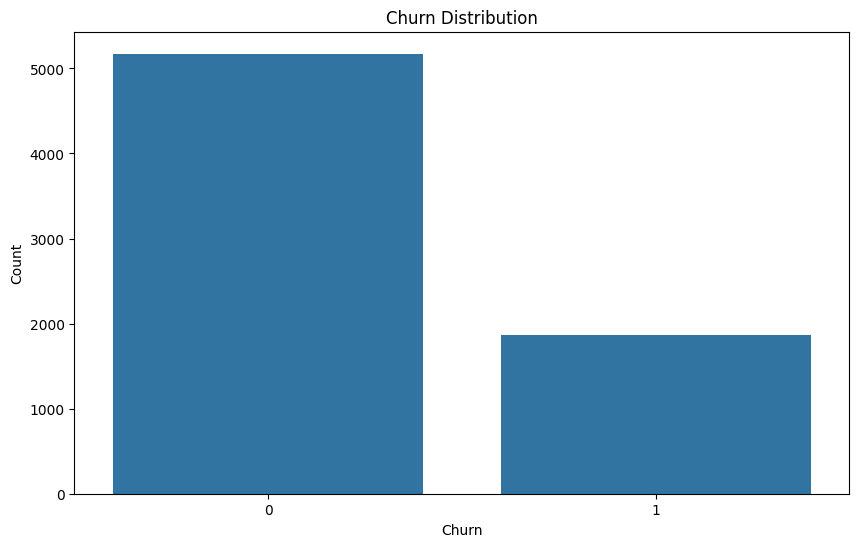

In [ ]:
# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Simple Feature Engineering

Create new features or transform existing ones to enhance the dataset’s predictive power.

Customer Lifetime Value is a new feature - Total Revenue * Tenure.

## Customer Lifetime Value

In [ ]:
# Simple Feature Engineering

# Assuming CLV can be approximated as Total Revenue * Tenure for simplicity
cleaned_df['CLV'] = cleaned_df['total_revenue'] * cleaned_df['tenure']

# Drop the Total Revenue and Tenure columns as they are now part of CLV

cleaned_df =cleaned_df.drop(['total_revenue', 'tenure'], axis=1)



In [ ]:
# Note that 30 columns are showing now and that CLV is now a feature - at the very end.

cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   int64  
 1   city                    7038 non-null   int64  
 2   zip_code                7038 non-null   int64  
 3   latitude                7038 non-null   float64
 4   longitude               7038 non-null   float64
 5   offer                   7038 non-null   int64  
 6   phone_service           7038 non-null   int64  
 7   multiple_lines          7038 non-null   int64  
 8   internet_service        7038 non-null   int64  
 9   internet_type           7038 non-null   int64  
 10  gigabits_used           7038 non-null   float64
 11  online_security         7038 non-null   int64  
 12  online_backup           7038 non-null   int64  
 13  device_protection_plan  7038 non-null   int64  
 14  premium_tech_support    7038 non-null   

## Total Services Used

In [ ]:
# Total Services Used
cleaned_df['total_services_used'] = (cleaned_df['phone_service'] + cleaned_df['internet_service'] + cleaned_df['streaming_tv'] + cleaned_df['streaming_movies'] +
                             cleaned_df['online_security'] + cleaned_df['online_backup'] + cleaned_df['device_protection_plan'] + cleaned_df['premium_tech_support'])


In [ ]:
# Total Services Used is now a new feature at the very end of the list.

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   int64  
 1   city                    7038 non-null   int64  
 2   zip_code                7038 non-null   int64  
 3   latitude                7038 non-null   float64
 4   longitude               7038 non-null   float64
 5   offer                   7038 non-null   int64  
 6   phone_service           7038 non-null   int64  
 7   multiple_lines          7038 non-null   int64  
 8   internet_service        7038 non-null   int64  
 9   internet_type           7038 non-null   int64  
 10  gigabits_used           7038 non-null   float64
 11  online_security         7038 non-null   int64  
 12  online_backup           7038 non-null   int64  
 13  device_protection_plan  7038 non-null   int64  
 14  premium_tech_support    7038 non-null   

# EXERCISE: Run the Cell to save the cleaned file.

In [ ]:
# Save the clean file. We'll use it now for Data visualizaition and analytics.

cleaned_df.to_csv('eda_telecom.csv', index=False)
